Pobranie repozytorium i instalacja wymagan

In [1]:
!git clone https://github.com/WongKinYiu/yolov7
%cd yolov7
!pip install -r requirements.txt

Pobranie zbioru danych z Roboflow

In [2]:
!pip install roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="###############")
project = rf.workspace("test-zktwp").project("pvyolov7")
dataset = project.version(1).download("yolov7")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to PVyolov7-1 in yolov7pytorch:: 100%|██████████| 1420/1420 [00:00<00:00, 1609.95it/s]


Uczenie sieci

In [3]:
%cd /content/yolov7
!python train.py --data {dataset.location}/data.yaml  --weights  ''  --cfg /content/yolov7/cfg/training/yolov7.yaml --epochs 1 --batch 16 --img 640   --device 0 --exist-ok --adam --image-weights

/content/yolov7
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=True, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='/content/yolov7/cfg/training/yolov7.yaml', data='/content/yolov7/PVyolov7-1/data.yaml', device='0', entity=None, epochs=1, evolve=False, exist_ok=True, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=True, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epoch

Detekcja

In [4]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.1 --source {dataset.location}/test/images

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.1, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/yolov7/PVyolov7-1/test/images', update=False, view_img=False, weights=['runs/train/exp/weights/best.pt'])
YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36514136 parameters, 6194944 gradients, 103.3 GFLOPS


Prezentacja wyników detekcji

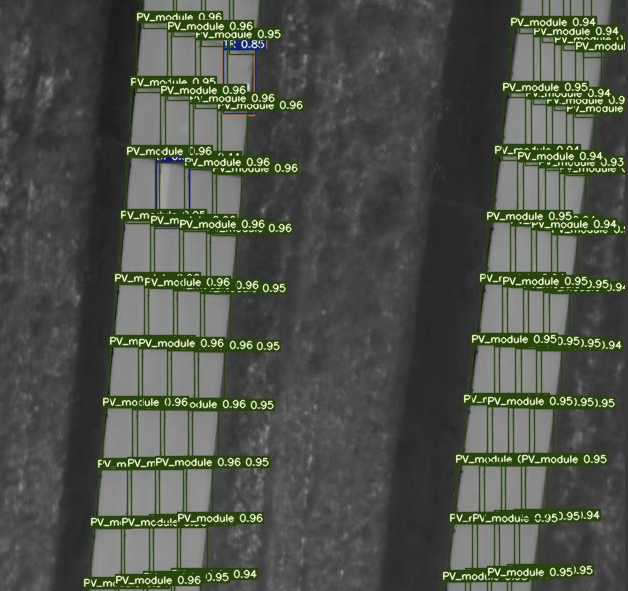

In [5]:
import glob
from IPython.display import Image, display

i = 0
limit = 10000 # max images to print
for imageName in glob.glob('/content/yolov7/runs/detect/exp/*.jpg'): #assuming JPG
    if i < limit:
      display(Image(filename=imageName))
      print("\n")
    i = i + 1